# Capstone project

# TMDB Movie Analysis

###### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,StackingRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
cr=pd.read_csv("C:/Users/saran/Downloads/DS_C14_Capstone_tmdb_5000_credits.csv")   # loading the two csv files into dataframes

mv=pd.read_csv("C:/Users/saran/Downloads/DS_C14_Capstone_tmdb_5000_movies.csv")

##### Exploring the two loaded datasets

In [4]:
cr.head(3)   

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [5]:
cr.shape

(4803, 4)

In [6]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

In [7]:
mv.head(3)

,budget,genres,homepage,id,keywords,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466


In [8]:
mv.shape

(4803, 18)

In [9]:
mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  title                

##### Merging the two dataframes on common column

In [10]:
movie_df=cr.merge(mv,left_on='movie_id',right_on='id')
movie_df.head()

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_companies,production_countries,release_date,revenue,runtime,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
movie_df.rename(columns={'title_x':'title'}, inplace=True)  # renaming the duplicated title column name and dropping one
movie_df.drop(columns=['id','title_y'],inplace=True)

##### Dealing with the columns having records in JSON format

In [12]:
# converting the crew column from JSon to string and then extracting director name and creating a new colum.

movie_df['crew'] = movie_df['crew'].apply(json.loads)
movie_df['director'] = movie_df['crew'].apply(lambda x: [crew_member['name'] for crew_member in x if crew_member['job'] == 'Director'][0] if any(crew_member['job'] == 'Director' for crew_member in x) else None)
movie_df = movie_df.drop('crew', axis=1)


# converting the remainig columns in JSON format using json.loads()

json_col= ['genres','keywords','production_companies','production_countries']
for col in json_col:
    movie_df[col]=movie_df[col].apply(lambda x: [item['name'] for item in json.loads(x)])


In [13]:
# # Extracting the names of first two cast from each records and adding to  new columns
# movie_df['cast'] = movie_df['cast'].apply(json.loads)
# movie_df['cast'] = movie_df['cast'].apply(lambda x: ', '.join(x))
# movie_df['cast 1'] = movie_df['cast'].str[0]
# movie_df['cast 2'] = movie_df['cast'].str[1]


In [14]:

movie_df['cast'] = movie_df['cast'].apply(json.loads)
movie_df['cast'] = movie_df['cast'].apply(lambda x: ', '.join([item['name'] for item in x]))
movie_df['cast 1'] = movie_df['cast'].str.split(', ').str[0]
movie_df['cast 2'] = movie_df['cast'].str.split(', ').str[1]

In [15]:
movie_df['genres'] = movie_df['genres'].apply(json.loads)
movie_df['genres'] = movie_df['genres'].apply(lambda x: ', '.join([item['name'] for item in x]))

movie_df['main genre'] = movie_df['genres'].str.split(', ').str[0]
movie_df['sub genre'] = movie_df['genres'].str.split(', ').str[1]

In [16]:
json_col = ['keywords', 'production_companies', 'production_countries']

for col in json_col:
    movie_df[col] = movie_df[col].apply(lambda x: [item['name'] for item in json.loads(x)])
    movie_df[col] = movie_df[col].str[0]  

In [17]:

# for col in json_col:
#     movie_df[col] = movie_df[col].apply(lambda x: ', '.join(x))

In [18]:
movie_df.head()

,movie_id,title,cast,budget,genres,homepage,keywords,original_language,overview,popularity,...,runtime,status,tagline,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre
0,19995,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,culture clash,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,Released,Enter the World of Pandora.,7.2,11800,James Cameron,Sam Worthington,Zoe Saldana,Action,Adventure
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley, S...",300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,ocean,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,Gore Verbinski,Johnny Depp,Orlando Bloom,Adventure,Fantasy
2,206647,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...",245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,spy,en,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,Released,A Plan No One Escapes,6.3,4466,Sam Mendes,Daniel Craig,Christoph Waltz,Action,Adventure
3,49026,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...",250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,dc comics,en,Following the death of District Attorney Harve...,112.312950,...,165.0,Released,The Legend Ends,7.6,9106,Christopher Nolan,Christian Bale,Michael Caine,Action,Crime
4,49529,John Carter,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...",260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,based on novel,en,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,Released,"Lost in our world, found in another.",6.1,2124,Andrew Stanton,Taylor Kitsch,Lynn Collins,Action,Adventure


In [19]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   budget                4803 non-null   int64  
 4   genres                4803 non-null   object 
 5   homepage              1712 non-null   object 
 6   keywords              4391 non-null   object 
 7   original_language     4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4452 non-null   object 
 11  production_countries  4629 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  status               

In [20]:
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']  #Adding a new column of profit
movie_df['profit'].head()

0    2550965087
1     661000000
2     635674609
3     834939099
4      24139100
Name: profit, dtype: int64

In [21]:
movie_df.isnull().sum()      #checking for null values

movie_id                   0
title                      0
cast                       0
budget                     0
genres                     0
homepage                3091
keywords                 412
original_language          0
overview                   3
popularity                 0
production_companies     351
production_countries     174
release_date               1
revenue                    0
runtime                    2
status                     0
tagline                  844
vote_average               0
vote_count                 0
director                  30
cast 1                     0
cast 2                    53
main genre                 0
sub genre                928
profit                     0
dtype: int64

In [22]:
movie_df.duplicated().sum()   # checking for duplicated values

0

In [23]:
movie_df = movie_df.dropna(subset=['release_date','director','cast 2','production_companies','production_countries'])   #dropping the null value records
movie_df['release_year'] = pd.to_datetime(movie_df['release_date']).dt.year        #Adding a new column of release year

In [24]:
movie_df = movie_df.drop(columns=['homepage','overview','tagline','cast','genres','keywords'], axis=1)   #dropping columnns with high % of missing values and unimportant columns
movie_df['runtime']=movie_df['runtime'].fillna(movie_df['runtime'].mean())
movie_df['sub genre'] = movie_df['sub genre'].fillna('none')

In [25]:
movie_df

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year
0,19995,Avatar,237000000,en,150.437577,Ingenious Film Partners,United States of America,10-12-2009,2787965087,162.0,Released,7.2,11800,James Cameron,Sam Worthington,Zoe Saldana,Action,Adventure,2550965087,2009
1,285,Pirates of the Caribbean: At World's End,300000000,en,139.082615,Walt Disney Pictures,United States of America,19-05-2007,961000000,169.0,Released,6.9,4500,Gore Verbinski,Johnny Depp,Orlando Bloom,Adventure,Fantasy,661000000,2007
2,206647,Spectre,245000000,en,107.376788,Columbia Pictures,United Kingdom,26-10-2015,880674609,148.0,Released,6.3,4466,Sam Mendes,Daniel Craig,Christoph Waltz,Action,Adventure,635674609,2015
3,49026,The Dark Knight Rises,250000000,en,112.312950,Legendary Pictures,United States of America,16-07-2012,1084939099,165.0,Released,7.6,9106,Christopher Nolan,Christian Bale,Michael Caine,Action,Crime,834939099,2012
4,49529,John Carter,260000000,en,43.926995,Walt Disney Pictures,United States of America,07-03-2012,284139100,132.0,Released,6.1,2124,Andrew Stanton,Taylor Kitsch,Lynn Collins,Action,Adventure,24139100,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,124606,Bang,0,en,0.918116,Asylum Films,United States of America,09-09-1995,0,98.0,Released,6.0,1,Ash Baron-Cohen,Darling Narita,Peter Greene,Drama,none,0,1995
4796,14337,Primer,7000,en,23.307949,Thinkfilm,United States of America,08-10-2004,424760,77.0,Released,6.9,658,Shane Carruth,Shane Carruth,David Sullivan,Science Fiction,Drama,417760,2004
4798,9367,El Mariachi,220000,es,14.269792,Columbia Pictures,Mexico,04-09-1992,2040920,81.0,Released,6.6,238,Robert Rodriguez,Carlos Gallardo,Jaime de Hoyos,Action,Crime,1820920,1992
4800,231617,"Signed, Sealed, Delivered",0,en,1.444476,Front Street Pictures,United States of America,13-10-2013,0,120.0,Released,7.0,6,Scott Smith,Eric Mabius,Kristin Booth,Comedy,Drama,0,2013


In [26]:
movie_df.shape  # checking for dimension of final dataframe

(4419, 20)

In [27]:
movie_df.describe()    # summary statistics of numerical columns

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4419.000000,4.419000e+03,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000
mean,52942.126273,3.144989e+07,23.219085,8.933932e+07,108.271390,6.180810,748.689296,5.788942e+07,2002.181942
std,84762.180695,4.155871e+07,32.594522,1.679270e+08,20.920031,1.019384,1270.337787,1.407760e+08,12.704067
min,5.000000,0.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,1916.000000
25%,8478.500000,2.600000e+06,6.249772,1.050000e+01,95.000000,5.700000,80.000000,-1.298568e+06,1999.000000
50%,13483.000000,1.700000e+07,14.752587,2.583662e+07,105.000000,6.300000,285.000000,6.361217e+06,2005.000000
75%,50646.500000,4.200000e+07,30.030585,1.016357e+08,118.000000,6.800000,826.000000,6.309199e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


In [28]:
movie_df.describe(exclude='number')     #summary statistics of non numerical columns

,title,original_language,production_companies,production_countries,release_date,status,director,cast 1,cast 2,main genre,sub genre
count,4419,4419,4419,4419,4419,4419,4419,4419,4419,4419,4419
unique,4417,34,1294,65,3117,2,2088,1866,2483,21,20
top,The Host,en,Paramount Pictures,United States of America,18-07-2013,Released,Steven Spielberg,Bruce Willis,Jennifer Aniston,Drama,none
freq,2,4153,280,2960,7,4418,27,30,15,1090,762


In [29]:
#movie_df= movie_df.drop(movie_df[(movie_df['budget']<1) | (movie_df['revenue']<1) | (movie_df['runtime']==0)].index)

In [30]:
movie_df.to_csv('C:/Users/saran/OneDrive/Documents/TMDB_movies.csv')    ## exporting as csv file

In [31]:
movie_df['release_year'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4795    1995
4796    2004
4798    1992
4800    2013
4802    2005
Name: release_year, Length: 4419, dtype: int64>

### EDA

In [32]:
categorical=[]
continuous=[]
def sort(df):   
    for column in df.columns:
        if df[column].dtype=='object' or df[column].nunique() <= 10:
            categorical.append(column)
        else:
            continuous.append(column)
    
    return categorical, continuous

In [33]:
sort(movie_df)

(['title',
  'original_language',
  'production_companies',
  'production_countries',
  'release_date',
  'status',
  'director',
  'cast 1',
  'cast 2',
  'main genre',
  'sub genre'],
 ['movie_id',
  'budget',
  'popularity',
  'revenue',
  'runtime',
  'vote_average',
  'vote_count',
  'profit',
  'release_year'])

In [34]:
categorical

['title',
 'original_language',
 'production_companies',
 'production_countries',
 'release_date',
 'status',
 'director',
 'cast 1',
 'cast 2',
 'main genre',
 'sub genre']

In [35]:
continuous

['movie_id',
 'budget',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count',
 'profit',
 'release_year']

In [36]:
def count(col):                               #defining a function for count plot
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(data=movie_df, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=75)
    plt.title(f'Count Plot of {col}')
    plt.show()

In [37]:
def pie(col):                               #defining a function for pie chart
    plt.figure(figsize=(22, 4))
    plt.subplot(1, 2, 2)
    df_counts = movie_df[col].value_counts()
    plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.show()

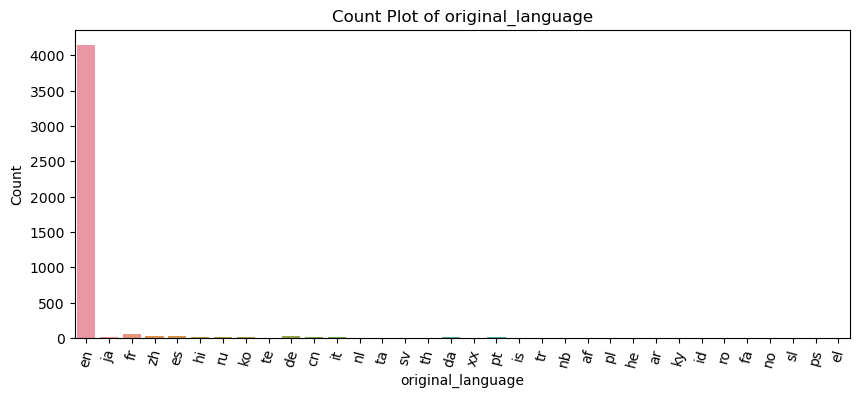

In [38]:
count('original_language')

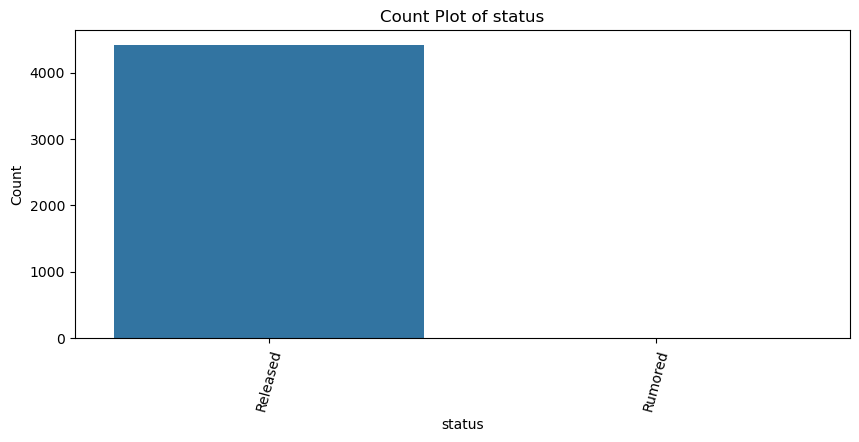

In [39]:
count('status')

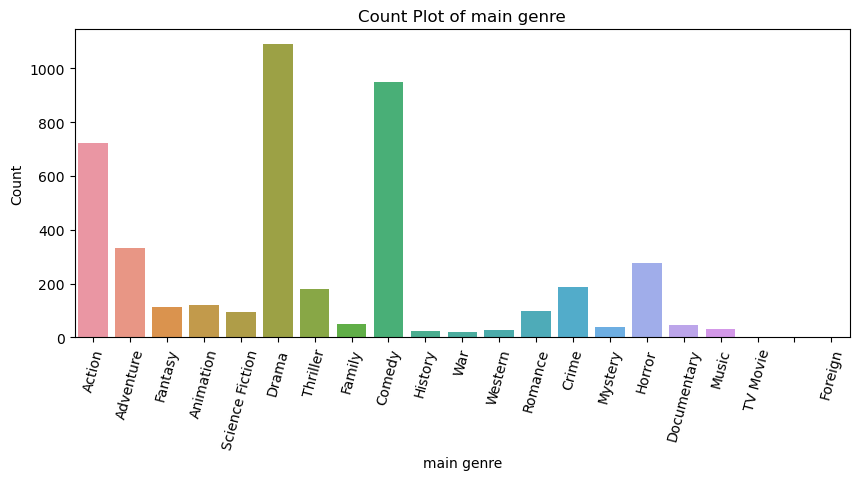

In [40]:
count('main genre')

In [41]:
movie_df['main genre'].value_counts()

Drama              1090
Comedy              949
Action              723
Adventure           334
Horror              278
Crime               188
Thriller            180
Animation           119
Fantasy             115
Romance             100
Science Fiction      94
Family               50
Documentary          48
Mystery              40
Music                33
Western              27
History              23
War                  22
TV Movie              3
                      2
Foreign               1
Name: main genre, dtype: int64

In [42]:
def num_plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram
    axes[0].hist(movie_df[col].dropna(), bins=20, edgecolor='black')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    axes[0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(data=movie_df, y=col, ax=axes[1])
    axes[1].set_ylabel(col)
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

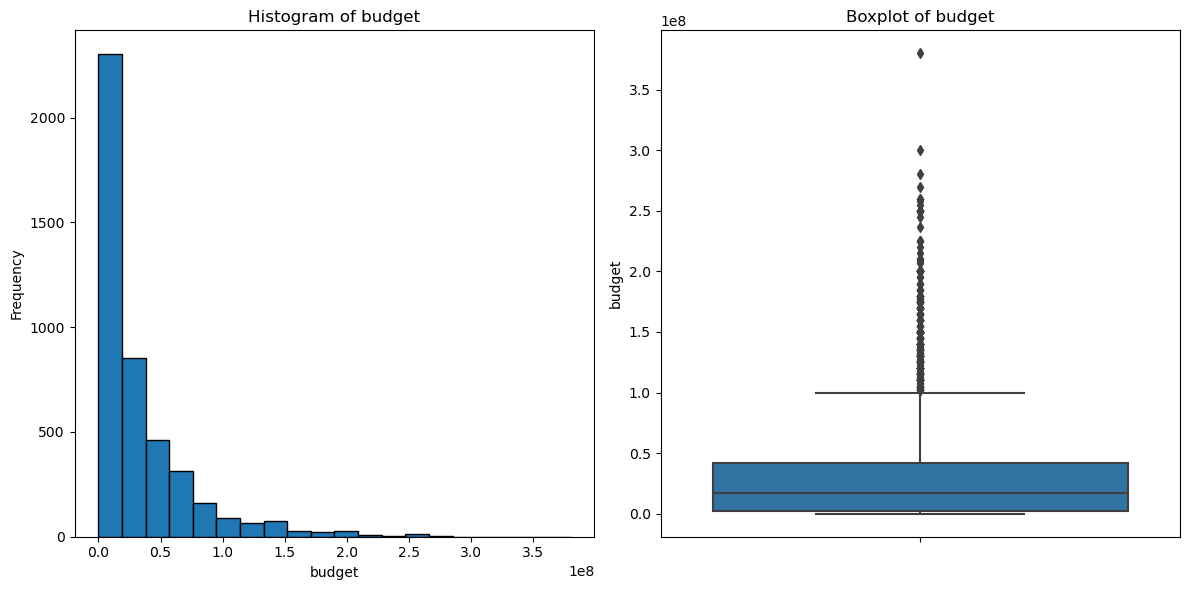

In [43]:
num_plot('budget')

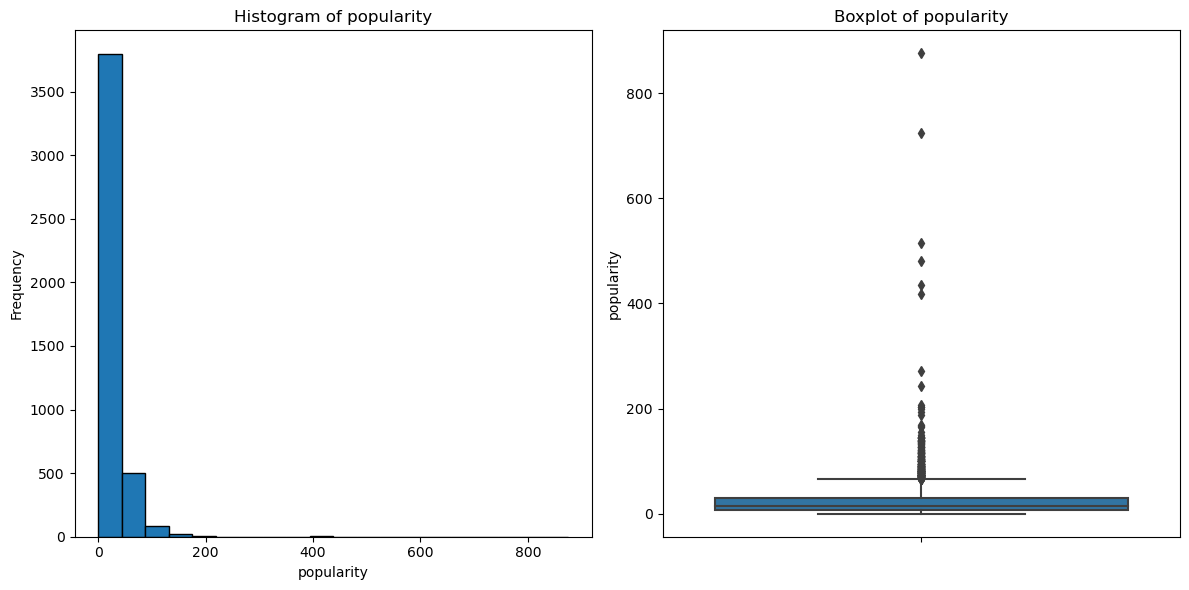

In [44]:
num_plot('popularity')

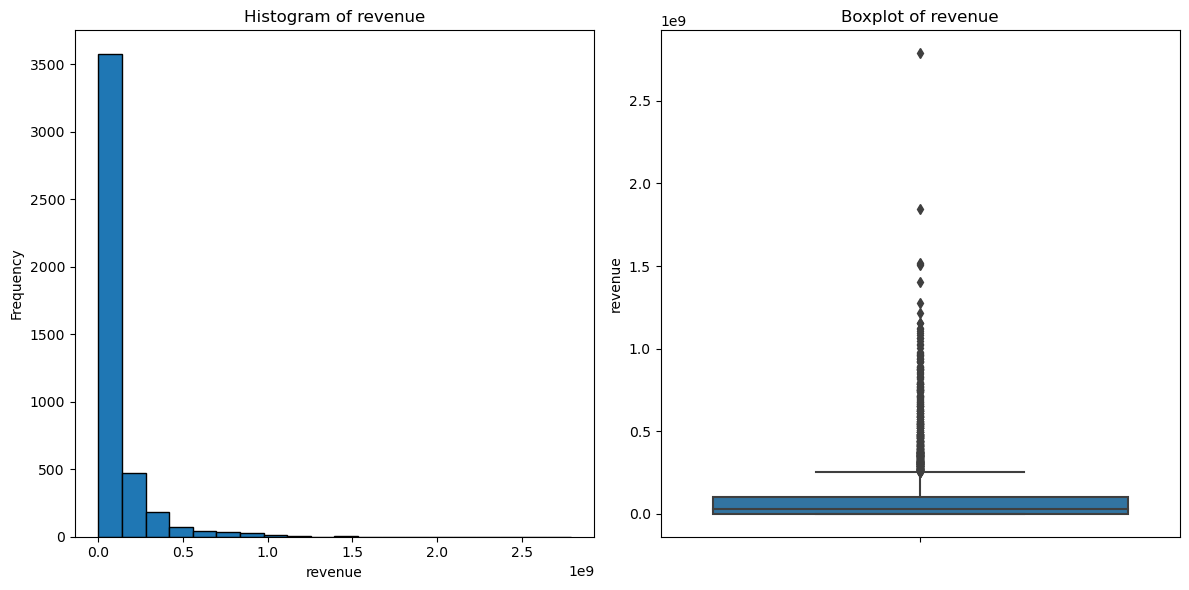

In [45]:
num_plot('revenue')

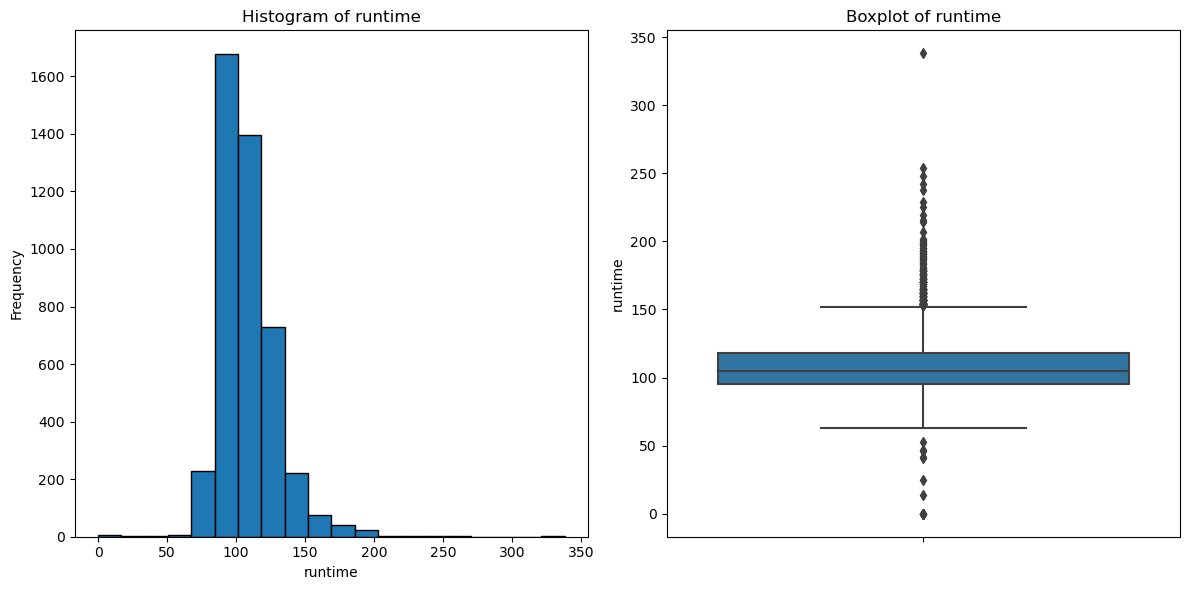

In [46]:
num_plot('runtime')

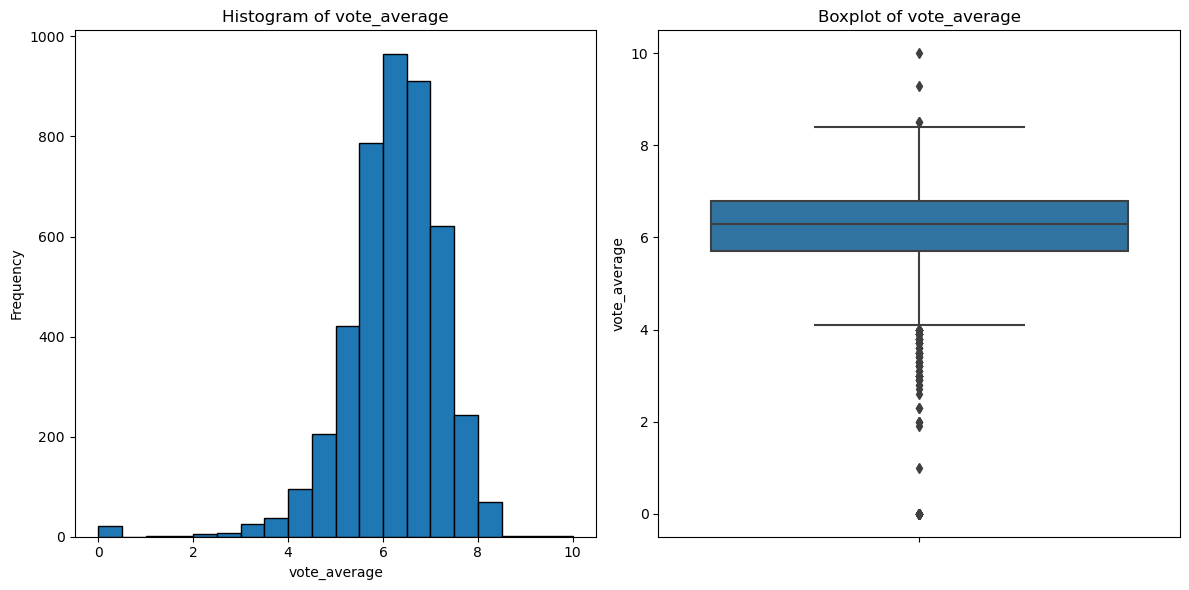

In [47]:
num_plot('vote_average')

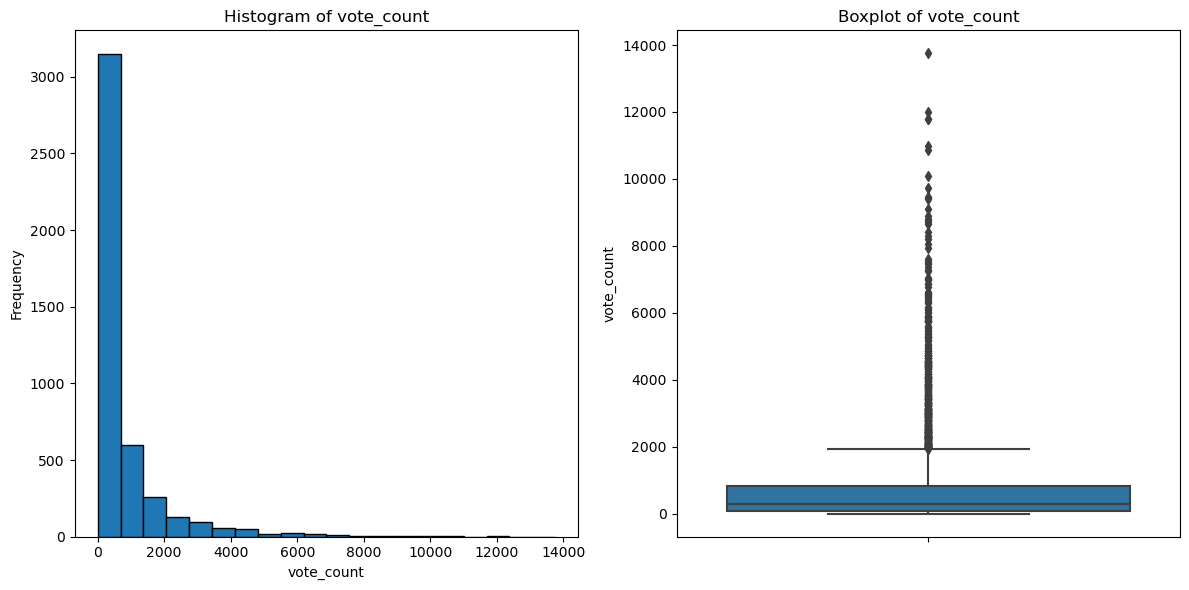

In [48]:
num_plot('vote_count')

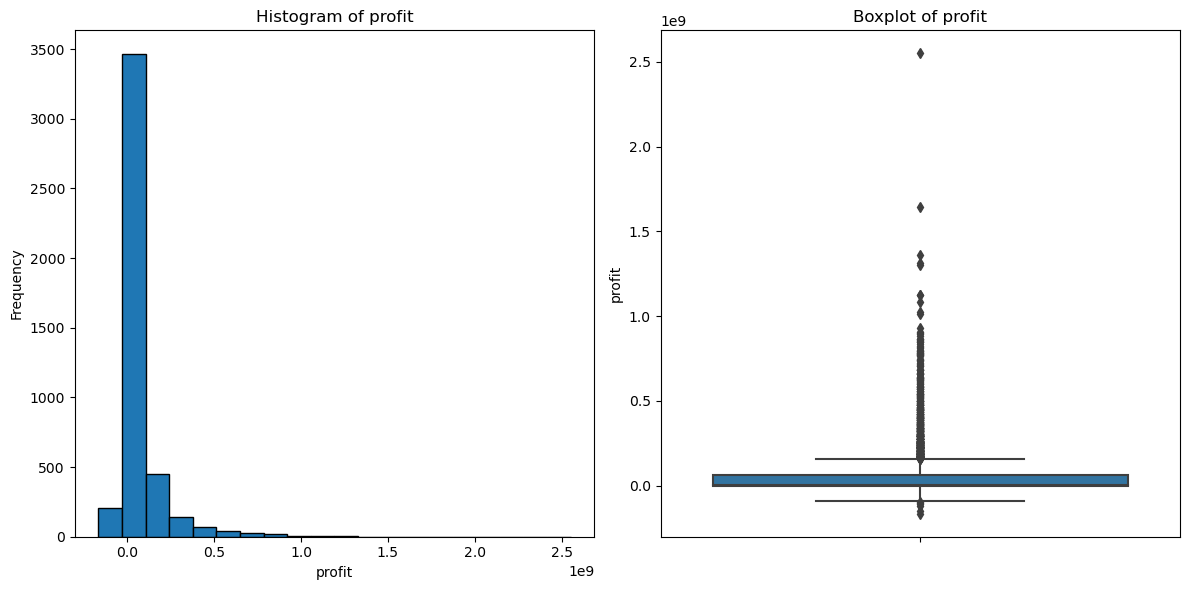

In [49]:
num_plot('profit')

<AxesSubplot:ylabel='Frequency'>

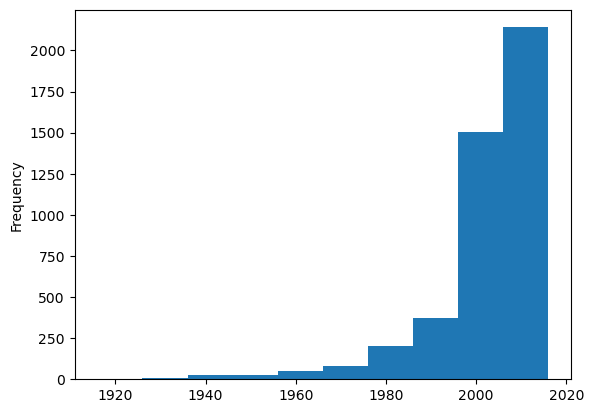

In [50]:
movie_df.release_year.plot(kind='hist',x="release_year",y="Distrbution")

In [51]:
movie_df.shape

(4419, 20)

In [52]:
movie_df.describe()

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4419.000000,4.419000e+03,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000
mean,52942.126273,3.144989e+07,23.219085,8.933932e+07,108.271390,6.180810,748.689296,5.788942e+07,2002.181942
std,84762.180695,4.155871e+07,32.594522,1.679270e+08,20.920031,1.019384,1270.337787,1.407760e+08,12.704067
min,5.000000,0.000000e+00,0.001586,0.000000e+00,0.000000,0.000000,0.000000,-1.657101e+08,1916.000000
25%,8478.500000,2.600000e+06,6.249772,1.050000e+01,95.000000,5.700000,80.000000,-1.298568e+06,1999.000000
50%,13483.000000,1.700000e+07,14.752587,2.583662e+07,105.000000,6.300000,285.000000,6.361217e+06,2005.000000
75%,50646.500000,4.200000e+07,30.030585,1.016357e+08,118.000000,6.800000,826.000000,6.309199e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


In [53]:
#Treating the data with zero values and outliers.

In [54]:
budget_25 = np.percentile(movie_df['budget'], 25)
movie_df.loc[movie_df['budget'] < budget_25, 'budget'] =budget_25

In [55]:
revenue_25 = np.percentile(movie_df['revenue'], 25)
movie_df.loc[movie_df['revenue'] < revenue_25, 'revenue'] =budget_25

In [56]:
movie_df.loc[movie_df['vote_average'] ==0 , 'vote_average'] = movie_df['vote_average'].mean()
movie_df.loc[movie_df['vote_count'] ==0 , 'vote_count'] = movie_df['vote_count'].mean()

In [57]:
movie_df.loc[movie_df['runtime'] ==0 , 'runtime'] = movie_df['runtime'].mean()

In [58]:
movie_df.to_csv('C:/Users/saran/OneDrive/Documents/TMDB_movies_capstone.csv')    ## exporting as csv file

In [59]:
movie_df.describe()  # rechecking

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,profit,release_year
count,4419.000000,4.419000e+03,4419.000000,4.419000e+03,4419.000000,4419.000000,4419.000000,4.419000e+03,4419.000000
mean,52942.126273,3.201290e+07,23.219085,8.998946e+07,108.393896,6.210183,752.247222,5.788942e+07,2002.181942
std,84762.180695,4.114530e+07,32.594522,1.675844e+08,20.600139,0.925577,1269.283675,1.407760e+08,12.704067
min,5.000000,2.600000e+06,0.001586,1.100000e+01,14.000000,1.000000,1.000000,-1.657101e+08,1916.000000
25%,8478.500000,2.600000e+06,6.249772,2.600000e+06,95.000000,5.700000,82.000000,-1.298568e+06,1999.000000
50%,13483.000000,1.700000e+07,14.752587,2.583662e+07,105.000000,6.300000,290.000000,6.361217e+06,2005.000000
75%,50646.500000,4.200000e+07,30.030585,1.016357e+08,118.000000,6.800000,826.000000,6.309199e+07,2010.000000
max,433715.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,2.550965e+09,2016.000000


### ML Models

In [60]:
movie_df2=movie_df.copy()
movie_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4419 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4419 non-null   int64  
 1   title                 4419 non-null   object 
 2   budget                4419 non-null   int64  
 3   original_language     4419 non-null   object 
 4   popularity            4419 non-null   float64
 5   production_companies  4419 non-null   object 
 6   production_countries  4419 non-null   object 
 7   release_date          4419 non-null   object 
 8   revenue               4419 non-null   int64  
 9   runtime               4419 non-null   float64
 10  status                4419 non-null   object 
 11  vote_average          4419 non-null   float64
 12  vote_count            4419 non-null   float64
 13  director              4419 non-null   object 
 14  cast 1                4419 non-null   object 
 15  cast 2               

In [61]:
obj = list(movie_df2.select_dtypes(include=['object']).columns)  # creating a list of all columns with datatype as object
obj

['title',
 'original_language',
 'production_companies',
 'production_countries',
 'release_date',
 'status',
 'director',
 'cast 1',
 'cast 2',
 'main genre',
 'sub genre']

In [62]:
for i in obj:                   # using label encoder to non numerical columns to numerical columns
    movie_df2[i]=LabelEncoder().fit_transform(movie_df2[i])
movie_df2.head(10)

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year
0,19995,350,237000000,6,150.437577,599,64,1009,2787965087,162.0,0,7.2,11800.0,790,1562,2477,1,1,2550965087,2009
1,285,2426,300000000,6,139.082615,1239,64,1948,961000000,169.0,0,6.9,4500.0,686,890,1827,2,8,661000000,2007
2,206647,2918,245000000,6,107.376788,258,63,2730,880674609,148.0,0,6.3,4466.0,1752,396,408,1,1,635674609,2015
3,49026,3325,250000000,6,112.312950,679,64,1634,1084939099,165.0,0,7.6,9106.0,322,326,1660,1,4,834939099,2012
4,49529,1746,260000000,6,43.926995,1239,64,614,284139100,132.0,0,6.1,2124.0,84,1709,1494,1,1,24139100,2012
5,559,2930,258000000,6,115.699814,258,64,63,890871626,139.0,0,5.9,3576.0,1755,1747,1367,9,0,632871626,2007
6,38757,3088,260000000,6,48.681969,1239,64,2516,591794936,100.0,0,7.4,3330.0,248,1859,1519,3,7,331794936,2010
7,99861,351,280000000,6,134.279229,742,64,2264,1405403694,141.0,0,7.3,6767.0,1049,1492,387,1,1,1125403694,2015
8,767,1455,250000000,6,98.885637,1244,63,648,933959197,153.0,0,7.4,5293.0,468,399,2057,2,8,683959197,2009
9,209112,409,250000000,6,155.790452,291,64,2362,873260194,151.0,0,5.7,7004.0,2078,163,880,1,1,623260194,2016


In [63]:
s_df=pd.DataFrame(MinMaxScaler().fit_transform(movie_df2),columns=movie_df2.columns)    # sacling the data using minmax scaler
s_df.head()

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year
0,0.046091,0.079257,0.621092,0.181818,0.171813,0.463264,1.000000,0.323813,1.000000,0.456790,0.0,0.688889,0.858047,0.378534,0.837534,0.997985,0.05,0.052632,1.000000,0.93
1,0.000646,0.549366,0.788023,0.181818,0.158845,0.958237,1.000000,0.625160,0.344696,0.478395,0.0,0.655556,0.327176,0.328701,0.477212,0.736100,0.10,0.421053,0.304310,0.91
2,0.476452,0.660779,0.642289,0.181818,0.122633,0.199536,0.984375,0.876123,0.315884,0.413580,0.0,0.588889,0.324704,0.839483,0.212332,0.164384,0.05,0.052632,0.294987,0.99
3,0.113027,0.752944,0.655538,0.181818,0.128271,0.525135,1.000000,0.524390,0.389151,0.466049,0.0,0.733333,0.662134,0.154288,0.174799,0.668815,0.05,0.210526,0.368336,0.96
4,0.114187,0.395380,0.682035,0.181818,0.050167,0.958237,1.000000,0.197047,0.101916,0.364198,0.0,0.566667,0.154389,0.040249,0.916354,0.601934,0.05,0.052632,0.069883,0.96


In [64]:
cor_matrix=s_df.corr()    # calculating the correlation matrix
cor_matrix

,movie_id,title,budget,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,director,cast 1,cast 2,main genre,sub genre,profit,release_year
movie_id,1.000000,-0.004467,-0.059494,0.081465,0.070243,-0.041066,-0.023903,0.005719,-0.028103,-0.087082,0.000773,-0.133029,0.032504,-0.033020,-0.023699,0.012435,0.137916,0.044503,-0.016471,0.432395
title,-0.004467,1.000000,0.034202,-0.012557,0.000946,0.011069,-0.008528,0.020560,0.025244,0.027588,-0.016433,0.025514,0.019869,-0.014176,-0.021382,0.017651,0.016221,-0.019317,0.019971,0.002531
budget,-0.059494,0.034202,1.000000,-0.065677,0.485256,0.093243,0.025355,0.035324,0.724049,0.258287,-0.010756,0.032743,0.578426,-0.001284,-0.006077,-0.014711,-0.170947,-0.228473,0.569390,0.193577
original_language,0.081465,-0.012557,-0.065677,1.000000,-0.056588,-0.061244,-0.190053,0.004161,-0.057529,0.080642,-0.002331,0.066888,-0.060687,0.018556,0.011776,0.034423,-0.010819,-0.015399,-0.049382,0.047698
popularity,0.070243,0.000946,0.485256,-0.056588,1.000000,0.086154,0.032851,0.027764,0.634742,0.211743,-0.010669,0.285211,0.770314,-0.015808,-0.001634,0.002445,-0.039953,-0.117232,0.614227,0.121124
production_companies,-0.041066,0.011069,0.093243,-0.061244,0.086154,1.000000,0.027176,0.010078,0.094241,0.036492,0.010727,0.009355,0.075189,0.001086,0.041444,0.001256,-0.043958,-0.051341,0.085154,-0.106021
production_countries,-0.023903,-0.008528,0.025355,-0.190053,0.032851,0.027176,1.000000,0.004396,0.066284,-0.025862,0.007322,-0.013710,0.049008,-0.012768,0.002192,0.006549,0.009697,0.011478,0.071940,-0.106733
release_date,0.005719,0.020560,0.035324,0.004161,0.027764,0.010078,0.004396,1.000000,0.041928,0.034331,-0.024600,0.020232,0.038090,-0.021113,0.024402,0.012806,0.004070,-0.008654,0.039578,-0.014698
revenue,-0.028103,0.025244,0.724049,-0.057529,0.634742,0.094241,0.066284,0.041928,1.000000,0.250642,-0.007846,0.199611,0.775109,-0.007360,0.022288,0.004178,-0.116377,-0.177463,0.979266,0.105475
runtime,-0.087082,0.027588,0.258287,0.080642,0.211743,0.036492,-0.025862,0.034331,0.250642,1.000000,-0.011244,0.374872,0.271351,0.051031,0.013532,0.006191,0.007662,-0.005089,0.222959,-0.162131


<AxesSubplot:>

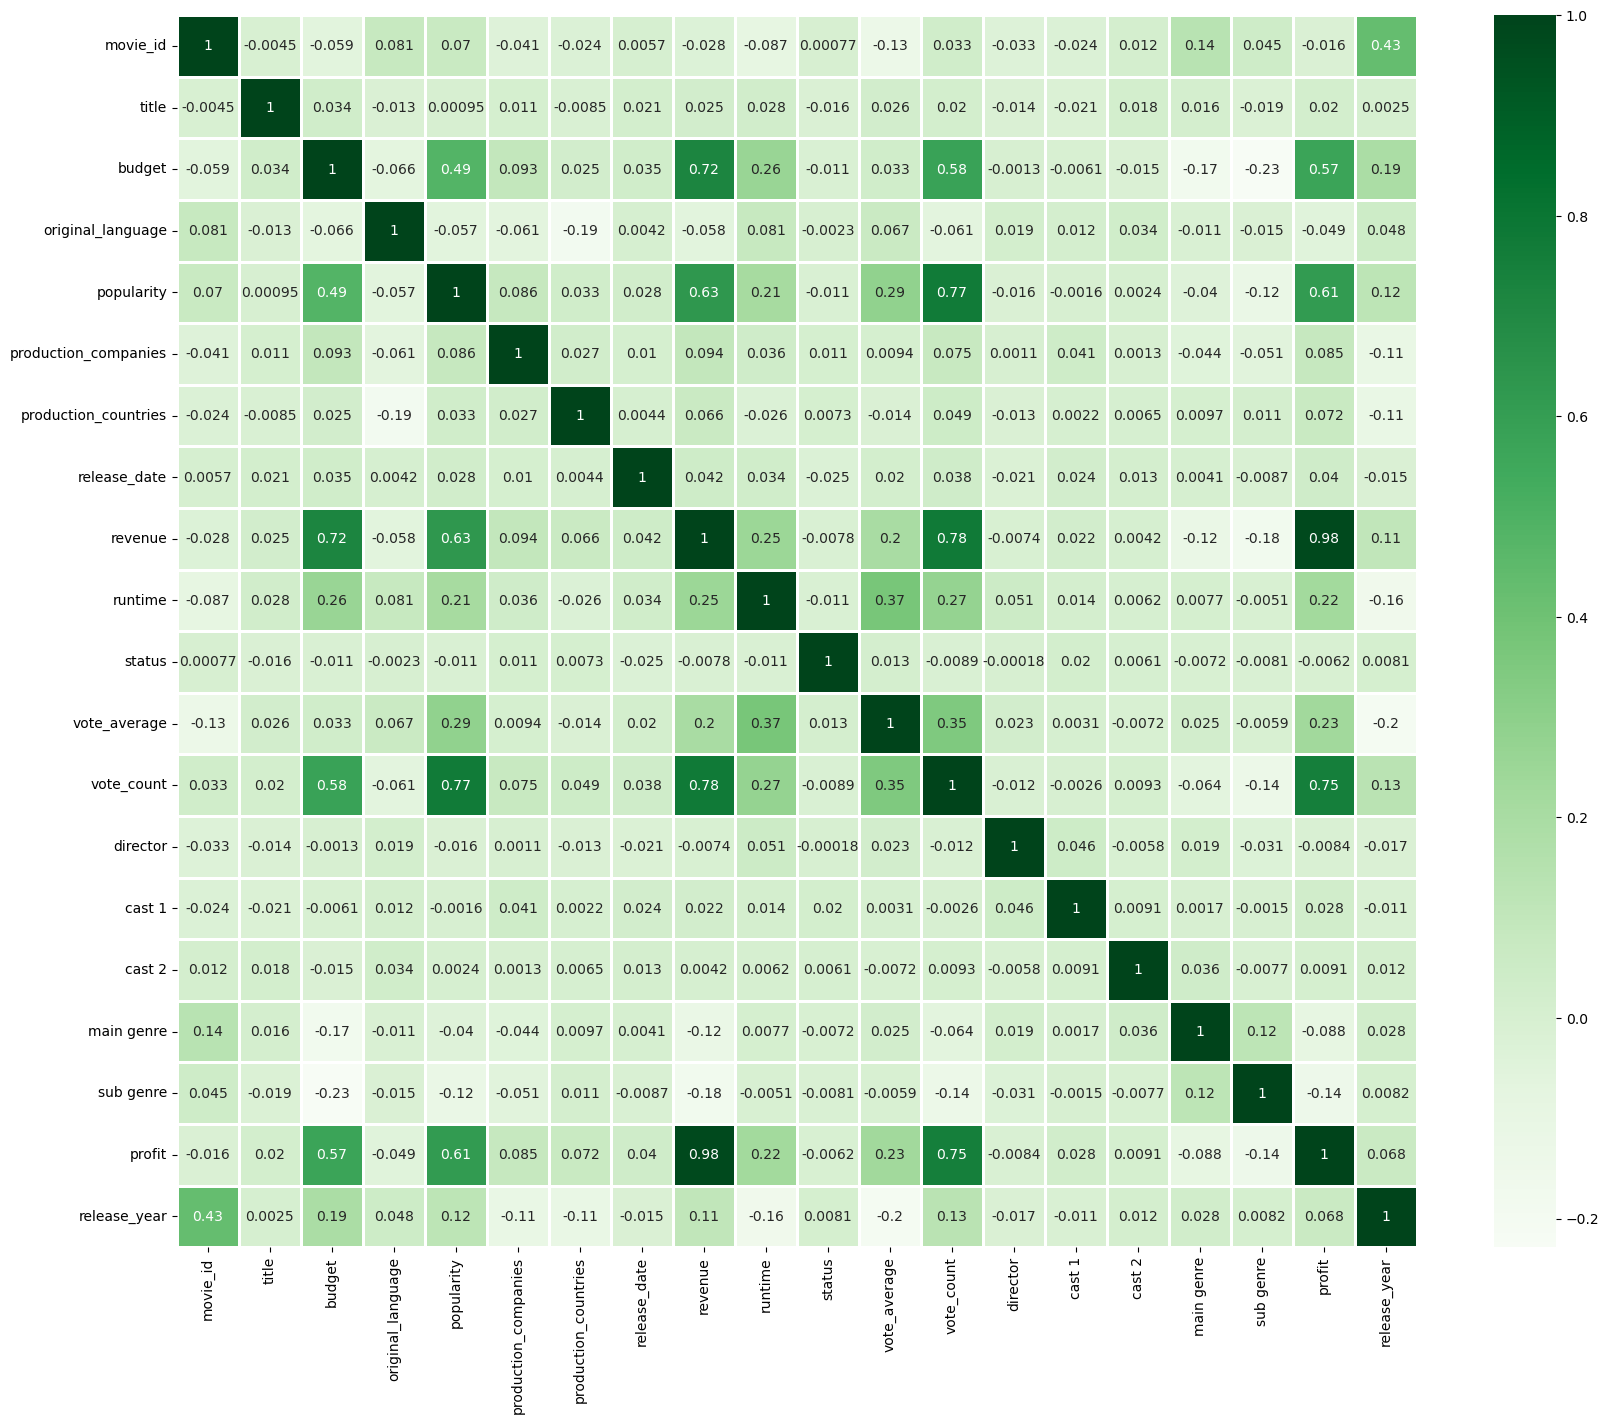

In [65]:
plt.figure(figsize=(20,16))
sns.heatmap(cor_matrix,annot=True, linewidths=1,cmap='Greens',linecolor='white')

In [66]:
def correlation(df,threshold):
    col_corr=set()
    correlation_matrix=df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if(abs(correlation_matrix.iloc[i,j]))>threshold:
                col_name=correlation_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [67]:
selected_features=correlation(s_df,0.7)
len(set(selected_features))

3

In [68]:
selected_features

{'profit', 'revenue', 'vote_count'}

In [69]:
s_df.drop(columns=['movie_id','title','release_date','status','original_language','cast 2','popularity','profit'],inplace=True)

In [70]:
X=s_df.drop('revenue',axis=1)       #seperating the features and target variables
y=movie_df2["revenue"] 

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)   # Splitting the data into training and testing data

In [72]:
print(X_train.shape)
print(y_test.shape)

(3093, 11)
(1326,)


In [73]:
def eval_scores(y_test, y_pred):                     # defining function to print evaluation metric scores of different models
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

    print("RMSE:", RMSE)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("MAPE:", MAPE)

## Linear regression

In [74]:
model1=LinearRegression().fit(X_train,y_train)     #creating a model using linear regression and fitting the data
print("Intercept:",model1.intercept_)
print("slope:",model1.coef_)

Intercept: 52741933.02420543
slope: [ 6.12001331e+08 -1.56850784e+06  1.05320140e+07 -3.08280551e+07
 -2.41851571e+07  1.02021627e+09 -1.05977370e+06  1.40005365e+07
 -1.12484573e+06 -4.60404523e+06 -6.41839487e+07]


In [75]:
y_pred=model1.predict(X_test)

In [76]:
#Adjusted R² = 1-(1-R²) * (n - 1)/(n-p-1)]

adj_r2train=1-(1-(model1.score(X_train,y_train)))*(3093-1)/(3093-10-1)
adj_r2test=1-(1-(model1.score(X_test,y_test)))*(1326-1)/(1326-10-1)

In [77]:
print('adj r score training : ',adj_r2train)
print('adj r score test : ',adj_r2test)

adj r score training :  0.7186802189626084
adj r score test :  0.7132562712177433


In [78]:
eval_scores(y_test,y_pred)

RMSE: 90185213.84140523
MSE: 8133372795619989.0
MAE: 48242315.007681616
MAPE: 3357.7614505914844


## KNN Regressor

In [81]:
for i in range(1,19):
    score = cross_val_score(KNeighborsRegressor(n_neighbors=i), X_train,y_train, scoring='r2',cv=kf)
    print(f"n_neighbors: {i}, Mean Score: {np.mean(score)}")

n_neighbors: 1, Mean Score: 0.36587096405284364
n_neighbors: 2, Mean Score: 0.5018937504041184
n_neighbors: 3, Mean Score: 0.5069878073106227
n_neighbors: 4, Mean Score: 0.5335660245985169
n_neighbors: 5, Mean Score: 0.5367142387141548
n_neighbors: 6, Mean Score: 0.5324773778042159
n_neighbors: 7, Mean Score: 0.5283619058905649
n_neighbors: 8, Mean Score: 0.5160525253307668
n_neighbors: 9, Mean Score: 0.5105926773948692
n_neighbors: 10, Mean Score: 0.5058419432243068
n_neighbors: 11, Mean Score: 0.49701657655816833
n_neighbors: 12, Mean Score: 0.48762606349885756
n_neighbors: 13, Mean Score: 0.4784113829101628
n_neighbors: 14, Mean Score: 0.47341025005504783
n_neighbors: 15, Mean Score: 0.47115123983896934
n_neighbors: 16, Mean Score: 0.46803004310927127
n_neighbors: 17, Mean Score: 0.46080199952126594
n_neighbors: 18, Mean Score: 0.4559383102917883


In [84]:
kmodel=KNeighborsRegressor(n_neighbors=6).fit(X_train,y_train)  #fitting the model

In [85]:
y_predk=kmodel.predict(X_test)

In [86]:
print("R_square Training data:",kmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",kmodel.score(X_test,y_test))

R_square Training data: 0.6915857677217704
R_square Test data: 0.5523047037804985


In [87]:
eval_scores(y_test,y_predk)

RMSE: 113116173.03940277
MSE: 1.2795268603080108e+16
MAE: 63278658.2440925
MAPE: 5133.642078911943


## Decision tree

In [80]:
kf=KFold(n_splits=5)

In [189]:
param_grid={'max_depth':[3,4,5,6,7,8,9,10],
           'min_samples_split':[10,20,30],
           'min_samples_leaf':[20,40,100]}

In [190]:
grid_cv=GridSearchCV(dmodel,param_grid,cv=kf)

In [191]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(max_depth=7, min_samples_leaf=40,
                                             min_samples_split=10),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30]})

In [192]:
grid_cv.best_score_

0.6654898331562679

In [193]:
grid_cv.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=40, min_samples_split=10)

In [90]:
dmodel=DecisionTreeRegressor(max_depth=7, min_samples_leaf=40, min_samples_split=10).fit(X_train,y_train)
y_pred2=dmodel.predict(X_test)           #fitting model on optimal hyperparameters


In [91]:
print("R_square Training data:",dmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",dmodel.score(X_test,y_test))

R_square Training data: 0.7210306417185554
R_square Test data: 0.704551533771938


In [92]:
eval_scores(y_test,y_pred2)

RMSE: 91891281.41443795
MSE: 8444007599987429.0
MAE: 45971991.93283638
MAPE: 1686.387117243155


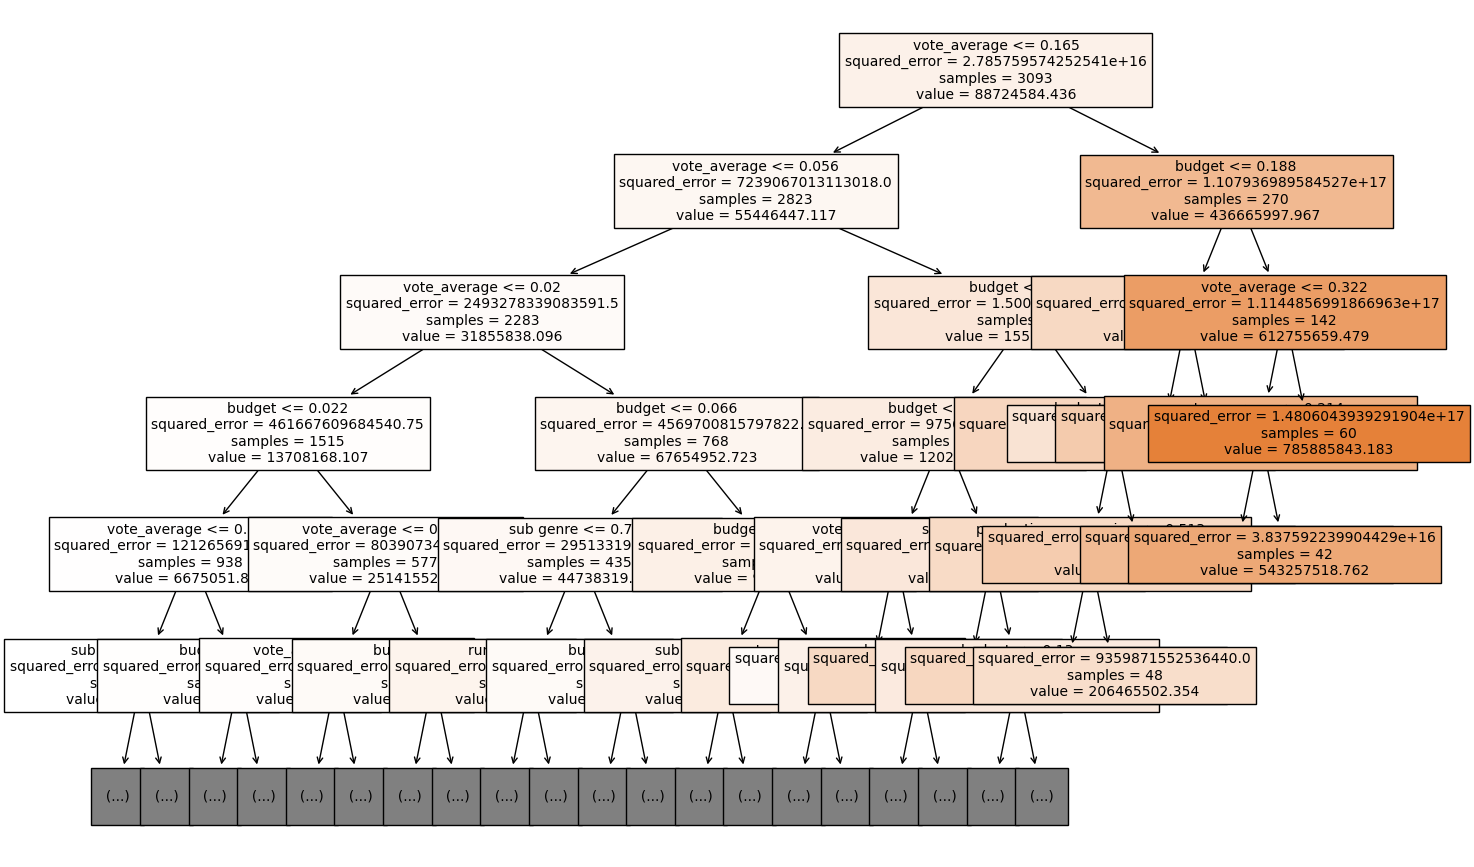

In [198]:
from sklearn import tree
plt.figure(figsize=(16,11))
tree.plot_tree(dmodel,max_depth=5,feature_names=s_df.columns,class_names=True,filled=True,fontsize=10)
plt.show()

## Random forest

In [200]:
param_grid2 = {'n_estimators': [20,40,50,80,100,150,200],
    'max_depth': [4,5,6,8,9,10],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10, 20, 40,],}

In [201]:
rf=RandomForestRegressor(random_state=42)
grid_cv2=GridSearchCV(rf,param_grid2,cv=5)

In [202]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 5, 6, 8, 9, 10],
                         'min_samples_leaf': [10, 20, 40],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [20, 40, 50, 80, 100, 150, 200]})

In [203]:
grid_cv2.best_score_

0.7292709525065281

In [204]:
grid_cv2.best_estimator_  #getting best param estimates

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [95]:
rfmodel=RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,n_estimators=200)
rfmodel.fit(X,y)
y_pred3=rfmodel.predict(X_test)
print("R_square Training data:",rfmodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",rfmodel.score(X_test,y_test))

R_square Training data: 0.8296179636425977
R_square Test data: 0.8483027600293416


In [96]:
eval_scores(y_test,y_pred3)

RMSE: 65844920.47282156
MSE: 4335553552072196.5
MAE: 33018794.344648797
MAPE: 1170.6325279655146


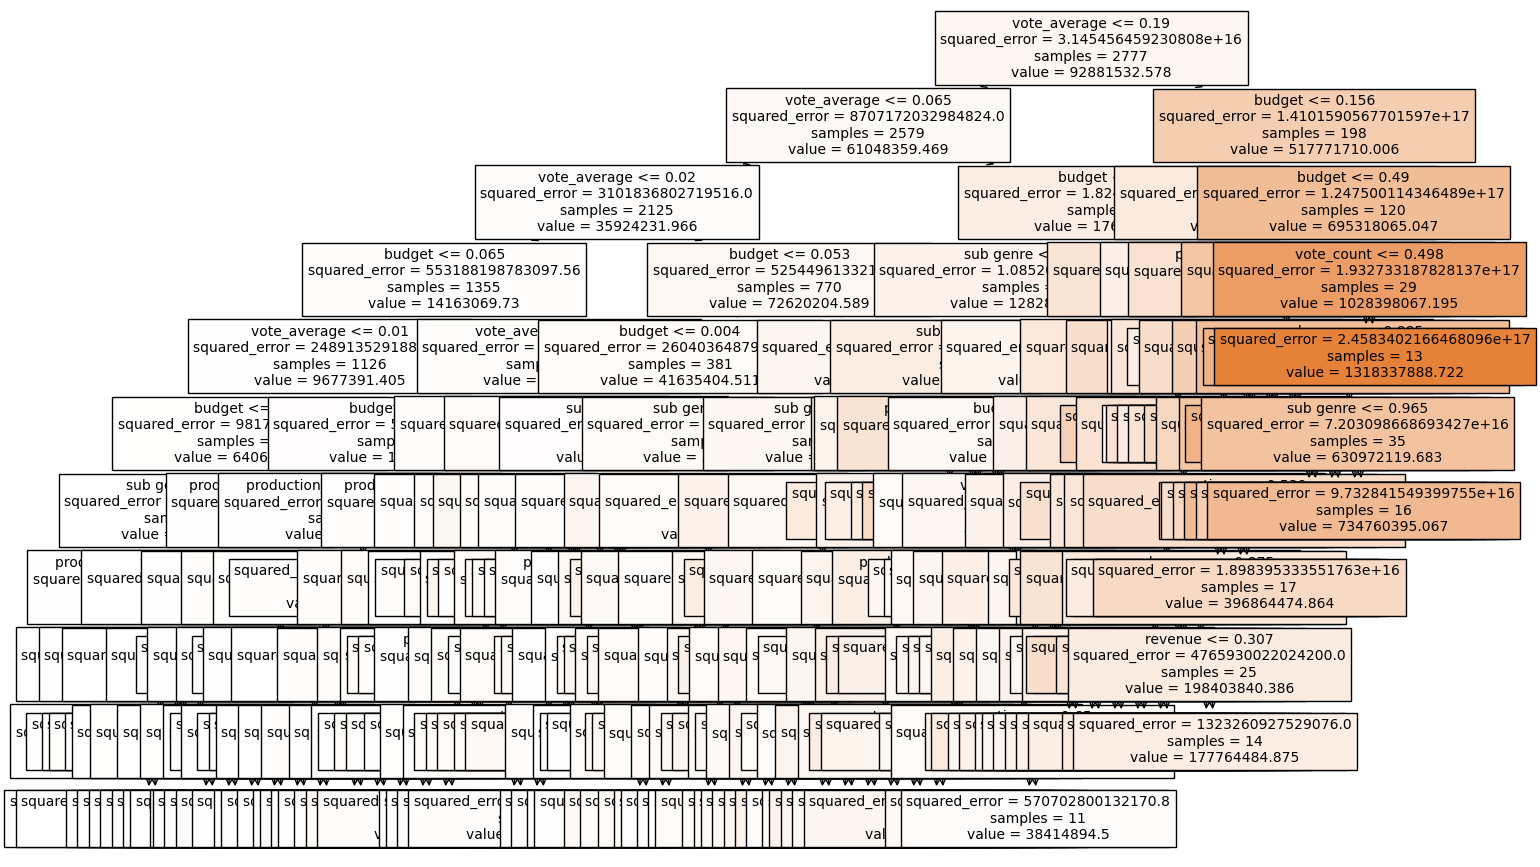

In [213]:
from sklearn import tree
plt.figure(figsize=(16,11))
tree.plot_tree(rfmodel[0],max_depth=10,feature_names=s_df.columns,class_names=True,filled=True,fontsize=10)
plt.show()

## Stacking Regressor

In [82]:
level1=[]
level1.append(('lr',LinearRegression()))
level1.append(('KNN',KNeighborsRegressor(n_neighbors=6)))
level1.append(('SVM',SVR()))
level1.append(('DT',DecisionTreeRegressor(max_depth=7 ,min_samples_leaf=10,min_samples_split=10, random_state=42)))
level1.append(('RF',RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=10,n_estimators=200, random_state=42)))
level2=LinearRegression()
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [ ]:
smodel=stack_model.fit(X_train,y_train)
y_preds=smodel.predict(X_test)

In [ ]:
print("R_square Training data:",smodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",smodel.score(X_test,y_test))

In [102]:
eval_scores(y_test,y_preds)

RMSE: 82871000.35784572
MSE: 6867602700310066.0
MAE: 43116145.37909116
MAPE: 650.7421303383189


## Adaboost Regressor

In [228]:
from sklearn.ensemble import AdaBoostRegressor

In [236]:
ada=AdaBoostRegressor()

In [237]:
param_grid3={'n_estimators' : [10,20,40,60,70,80,100,150,200],
             'learning_rate':[0.001,0.01,0.1,1]}

In [239]:
grid_cv3=GridSearchCV(ada,param_grid3,cv=kf)

In [240]:
grid_cv3.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [10, 20, 40, 60, 70, 80, 100, 150,
                                          200]})

In [242]:
grid_cv3.best_score_

0.69866814533567

In [243]:
grid_cv3.best_estimator_

AdaBoostRegressor(learning_rate=0.01, n_estimators=200)

In [244]:
adamodel=AdaBoostRegressor(learning_rate=0.01, n_estimators=200)
adamodel.fit(X,y)
y_pred4=adamodel.predict(X_test)

In [245]:
print("R_square Training data:",adamodel.score(X_train,y_train))  # printing model score for training and test data
print("R_square Test data:",adamodel.score(X_test,y_test))

R_square Training data: 0.755783548744671
R_square Test data: 0.7431624970966664


In [246]:
eval_scores(y_test,y_pred4)

RMSE: 85676685.56590001
MSE: 7340494449558100.0
MAE: 49690688.28633788
MAPE: 3236.865111903476


##### On Comparison of model performance using evaluation metrics, Random forest has the best performace and hence chosen as the final model.